Data wrangling o data munging es el proceso de transformar y mapear los datos de un dataset (raw) en otro formato más apropiado.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

file = '../datasets/customer-churn-model/Customer Churn Model.txt'
data = pd.read_csv(file)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Subsets

In [7]:
# Serie -> valores de una consulta
account_length = data['Account Length']
print(type(account_length), '\n')
column_names = data.columns.values.tolist()
print(column_names, '\n')
account_length.head()

<class 'pandas.core.series.Series'> 

['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'] 



0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

## Desired columns

In [9]:
desired_columns = ['Account Length', 'Phone', 'Eve Charge', 'Day Calls']
print(desired_columns, '\n')
subset = data[desired_columns]
subset.head()

['Account Length', 'Phone', 'Eve Charge', 'Day Calls'] 



,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


## Undesired columns

In [11]:
undesired_columns = [x for x in column_names if x not in desired_columns]
print(sublist)
subset = data[undesired_columns]
subset.head()

['State', 'Area Code', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Charge,Eve Mins,Eve Calls,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,45.07,197.4,99,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,27.47,195.5,103,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,41.38,121.2,110,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,50.90,61.9,88,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,28.34,148.3,122,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
a = set(desired_columns)
b = set(column_names)
c = list(b - a)
print(c)
data[c].head()

['Eve Mins', 'Night Mins', 'State', 'Intl Mins', 'Intl Calls', 'Night Charge', 'VMail Message', 'Churn?', 'Day Charge', 'CustServ Calls', 'Intl Charge', "Int'l Plan", 'Night Calls', 'VMail Plan', 'Day Mins', 'Area Code', 'Eve Calls']


,Eve Mins,Night Mins,State,Intl Mins,Intl Calls,Night Charge,VMail Message,Churn?,Day Charge,CustServ Calls,Intl Charge,Int'l Plan,Night Calls,VMail Plan,Day Mins,Area Code,Eve Calls
0,197.4,244.7,KS,10.0,3,11.01,25,False.,45.07,1,2.70,no,91,yes,265.1,415,99
1,195.5,254.4,OH,13.7,3,11.45,26,False.,27.47,1,3.70,no,103,yes,161.6,415,103
2,121.2,162.6,NJ,12.2,5,7.32,0,False.,41.38,0,3.29,no,104,no,243.4,415,110
3,61.9,196.9,OH,6.6,7,8.86,0,False.,50.90,2,1.78,yes,89,no,299.4,408,88
4,148.3,186.9,OK,10.1,3,8.41,0,False.,28.34,3,2.73,yes,121,no,166.7,415,122


## Get specific data (indexes, loc, iloc)

In [15]:
data[0:3]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [30]:
data[1:4]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.


In [16]:
data[data['Day Mins'] > 300].head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,...,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True.
230,MD,93,408,360-3324,yes,no,0,312.0,109,53.04,...,100,11.00,217.6,74,9.79,10.5,2,2.84,0,True.


In [17]:
data[data['State'] == "NY"].head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,...,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.


In [18]:
data[(data['Day Mins'] > 300) & (data['State'] == 'NY')].head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [19]:
data[(data['Day Mins'] > 300) | (data['State'] == 'NY')].head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.


In [20]:
data[(data['Day Calls'] < data['Night Calls'])].head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.


In [8]:
subset_first_50 = data[['Day Mins', 'Night Mins', 'Account Length'][:50]]
subset_first_50.head()

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75


In [12]:
data.iloc[1:10, :10]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96


In [13]:
data.iloc[:,3:5]

,Phone,Int'l Plan
0,382-4657,no
1,371-7191,no
2,358-1921,no
3,375-9999,yes
4,330-6626,yes
...,...,...
3328,414-4276,no
3329,370-3271,no
3330,328-8230,no
3331,364-6381,yes


In [14]:
data.iloc[1:10, [2,5,7]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7
5,510,no,223.4
6,510,yes,218.2
7,415,no,157.0
8,408,no,184.5
9,415,yes,258.6


In [15]:
data.loc[1:10, ["Area Code"]]

,Area Code
1,415
2,415
3,408
4,415
5,510
6,510
7,415
8,408
9,415
10,415


In [16]:
data["Total Mins"] = data['Day Mins'] + data['Night Mins'] + data['Eve Mins']
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9


# Random numbers

In [24]:
# Random with range (random)
import random as rd
print(rd.randrange(0, 100, 7))

# Between 1 to n
print(np.random.randint(1, 1000))

# entre 0 y 1 con decimales
print(np.random.random())

def rand_list(n, a, b):
    x = []
    for i in range(n):
        x.append(np.random.randint(a, b))
    return x

print(rand_list(25, 1, 50))

98
321
0.8575953525651016
[28, 29, 10, 49, 38, 10, 43, 6, 20, 47, 20, 40, 29, 16, 38, 20, 21, 42, 24, 35, 19, 22, 39, 17, 41]


# Shuffling

In [28]:
a = np.arange(100)
print(a)
np.random.shuffle(a)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 4 20 54 16 52  0 70 79 19 11 84 23 18 67  3 34 46 36 75 87 61 65  9 50
 78 43 73 93 97 28 30 56 69 71 10 39 74 22  2  1 49 82 14  5 60 31 27 76
 64 32 38 42  8 25 77 37 80 89 44 90 53 85 57 83 21 17 55 15 91 72 13 47
  7 86  6 88 33 12 95 99 35 40 59 62 96 68 81 66 63 41 94 98 58 26 45 92
 48 29 51 24]


# Choice

In [29]:
column_list = data.columns.values.tolist()
np.random.choice(column_list)

'Night Charge'

# Seed

In [33]:
for i in range(4):
    print(np.random.random())
print('\n', 'Seeding', '\n')
np.random.seed(2020)
for i in range(4):
    print(np.random.random())

0.33691872774596354
0.21695426501692427
0.27647714315379956
0.34331559277945756

 Seeding 

0.9862768288615988
0.8733919458206546
0.5097455249715815
0.27183571428207576


# Probability distribution

In [9]:
probability distributiona = 1
b=100
n=10000
m = np.random.uniform(a, b, n)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([ 9999.5,  9999.6,  9999.7,  9999.8,  9999.9, 10000. , 10000.1,
        10000.2, 10000.3, 10000.4, 10000.5]),
 <a list of 10 Patch objects>)

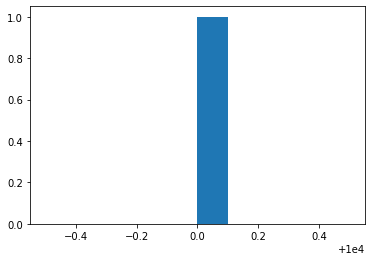

In [10]:
%matplotlib inline
plot.hist(n)

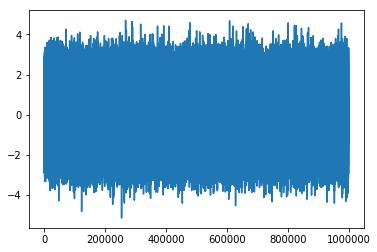

In [34]:
x = range(1, 1000001)
z = np.random.randn(1000000)
plot.plot(x, z)

(array([8.50000e+01, 2.47900e+03, 2.87600e+04, 1.50350e+05, 3.34494e+05,
        3.23166e+05, 1.34455e+05, 2.42450e+04, 1.90600e+03, 6.00000e+01]),
 array([-4.70738524, -3.75785244, -2.80831964, -1.85878684, -0.90925404,
         0.04027877,  0.98981157,  1.93934437,  2.88887717,  3.83840997,
         4.78794277]),
 <a list of 10 Patch objects>)

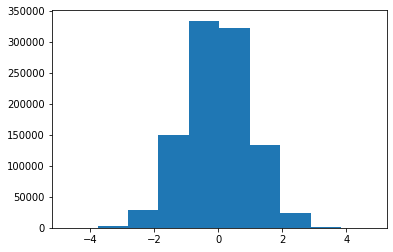

In [31]:
plot.hist(z)

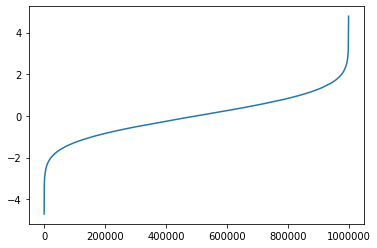

In [32]:
plot.plot(x, sorted(z))

(array([1.600e+01, 1.140e+02, 7.480e+02, 2.241e+03, 3.288e+03, 2.521e+03,
        8.870e+02, 1.700e+02, 1.400e+01, 1.000e+00]),
 array([-4.44893597, -2.26098822, -0.07304048,  2.11490727,  4.30285502,
         6.49080276,  8.67875051, 10.86669826, 13.054646  , 15.24259375,
        17.4305415 ]),
 <a list of 10 Patch objects>)

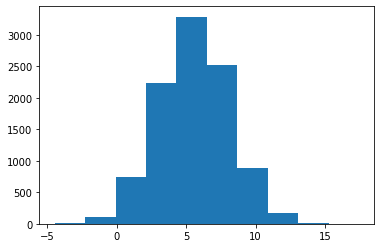

In [36]:
mu = 5.5
sd = 2.5
data = mu + (sd*np.random.randn(10000))
plot.hist(data)

In [38]:
data = np.random.randn(2,4)
data

array([[ 1.52958555,  0.44934911, -0.89666175,  0.90681928],
       [-1.15910559,  0.42420292, -0.15314781,  1.32874828]])

# Monte Carlo's simulation

Generamos dos números aleatorios x, y entre 0 y 1
Calcularemos x * x + y * y
* Si el valor es < 1 -> Estamos dentro del círculo
* Si el valor es > 1 -> Estamos fuera del círculo

Calculamos el número total de veces qeu están dentro del círculo y lo dividios entre el número total de intentos para obtener la probabilidad
La probabilidad se usa para aproximar el valor de π
Repetir un número suficiente de veces para obtener diferentes aproximaciones de π
Calcular el promedio para obtener el valor de π

3.1478400000000017


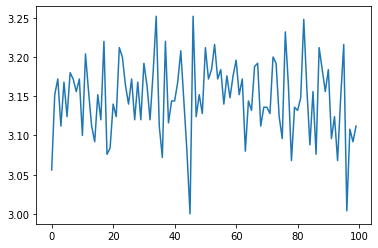

In [40]:
pi_avg = 0
n = 1000
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0,1, n).tolist()
    y = np.random.uniform(0,1, n).tolist()
    for j in range(n):
        z = np.sqrt(x[j] * x[j] + y[j] * y[j])
        if z<=1:
            value += 1
    pi_value = float(value) * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
pi = pi_avg / 100

print(pi)
plot.plot(pi_value_list)

# Dummy data sets

In [44]:
n = 10000
data = pd.DataFrame({
    'A': np.random.randn(n),
    'B': 1.5 + 2.5 * np.random.randn(n),
    'C': np.random.uniform(5, 32, n),
})
data.head(10)

,A,B,C
0,1.113429,-1.471538,16.107185
1,-0.482056,4.338707,11.885952
2,1.243034,2.682754,12.171693
3,-0.315660,3.467352,20.543520
4,0.053499,1.124347,23.953016
5,0.505765,-2.199547,30.015577
6,-1.601226,4.854348,12.383442
7,0.313439,4.781902,17.087009
8,0.296573,-0.050467,25.045016
9,0.697081,2.672184,24.819127


(array([   6.,   82.,  403., 1203., 2445., 2809., 1975.,  826.,  221.,
          30.]),
 array([-3.82997079, -3.10653335, -2.3830959 , -1.65965845, -0.936221  ,
        -0.21278356,  0.51065389,  1.23409134,  1.95752879,  2.68096623,
         3.40440368]),
 <a list of 10 Patch objects>)

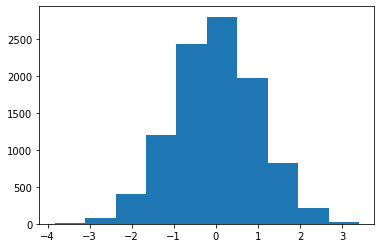

In [45]:
plot.hist(data['A'])

(array([1.000e+00, 1.200e+01, 1.750e+02, 8.740e+02, 2.524e+03, 3.379e+03,
        2.204e+03, 7.220e+02, 1.050e+02, 4.000e+00]),
 array([-10.50014529,  -8.28667028,  -6.07319527,  -3.85972026,
         -1.64624524,   0.56722977,   2.78070478,   4.99417979,
          7.20765481,   9.42112982,  11.63460483]),
 <a list of 10 Patch objects>)

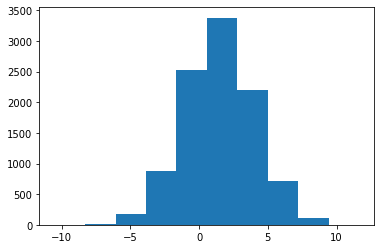

In [46]:
plot.hist(data['B'])

(array([1013., 1000., 1044.,  977.,  993.,  952., 1045.,  994., 1003.,
         979.]),
 array([ 5.00535519,  7.70481688, 10.40427856, 13.10374025, 15.80320193,
        18.50266362, 21.20212531, 23.90158699, 26.60104868, 29.30051037,
        31.99997205]),
 <a list of 10 Patch objects>)

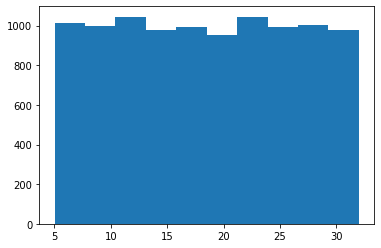

In [47]:
plot.hist(data['C'])

In [4]:
column_names = data.columns.values.tolist()
column_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [6]:
new_data = pd.DataFrame({
    'colum name': column_names,
    'a': np.random.randn(len(column_names)),
    'b': np.random.uniform(0, 1, len(column_names)),
}, index = range(42, 42 + len(column_names))
)
new_data

,colum name,a,b
42,State,-0.028235,0.074953
43,Account Length,1.341960,0.945497
44,Area Code,-0.168905,0.936183
45,Phone,-1.240383,0.514362
46,Int'l Plan,0.747203,0.249065
47,VMail Plan,-1.160834,0.971683
48,VMail Message,0.916735,0.532347
49,Day Mins,-0.886547,0.383176
50,Day Calls,0.518663,0.350713
51,Day Charge,0.088125,0.785095
